# Events

## Example Usage of Events

In [9]:
'''
Imports

NOTE*** Currently the only solvers in the GillesPy2 library which implements events are the NumPy TauHybridSolver and TauHybridCSolver.
This solver can handle events for both discrete and continuous systems as well as mixed ode/ssa systems.  The type
of simulation executed is determined by setting the "mode" attribute of each species to the appropriate setting
("continuous", "discrete", or "dynamic")
'''

import sys
sys.path.insert(1, '../../../GillesPy2')
import numpy as np
import gillespy2

# HOW TO BUILD AN EVENT IN GILLESPY2

Events allow changes to be made to a system (Event Assignments) as a result of a user defined condition (event trigger). Events in GillesPy2 are represented by 3 different Python objects:  
  
    1) Event(name=String, trigger=EventTrigger, assignments=(EventAssignment or  list of EventAssignments), delay=String, use_values_from_trigger_time=bool)  
    2) EventTrigger(expression=String, persistent=bool, value=bool)  
    3) EventAssignment(variable=(GillesPy2.Species, GillesPy2.Parameter), expression=String)  
    

## Example of a Discrete Stochastic system with Events

In [10]:
class Example(gillespy2.Model):
    """                                                                                                                                                                                                                              
    This is a simple example for mass-action degradation of species S.  We will add two events
    to demonstrate the usage of events.  The first event will assign the value '0' to our species
    once time passes 20, and the second event will be triggered once time crosses 30, assigning
    a value of "100" to our species and changing the value of our degradation rate parameter
    "k1" from .01 to .1, causing the species to decay more quickly.
    """                                                                                                                                                                                                                              
                                                                                                                                                                                                                                     
    def __init__(self, parameter_values=None):                                                                                                                                                                                       
        
        # Initialize the model.                                                                                                                                                                                                      
        gillespy2.Model.__init__(self, name="Example")

        # Species                                                                                                                                                                                                                    
        S = gillespy2.Species(name='Sp', initial_value=100, mode='discrete')
        self.add_species([S])
        
        # Parameters                                                                                                                                                                                                                 
        k1 = gillespy2.Parameter(name='k1', expression=0.01)
        self.add_parameter([k1])    
        
        # Events
        et = gillespy2.EventTrigger(expression='t>20')
        ea = gillespy2.EventAssignment(variable=S, expression='0')
        e = gillespy2.Event(name='event1', trigger=et, assignments=ea)
        
        et2 = gillespy2.EventTrigger(expression='t>30', persistent=True)
        ea2 = gillespy2.EventAssignment(variable=S, expression='100')
        ea3 = gillespy2.EventAssignment(variable=k1, expression='.1')
        e2 = gillespy2.Event(name='event2', trigger=et2, assignments=[ea2, ea3])
        self.add_event([e, e2])
        
        #Reactions
        r = gillespy2.Reaction(name='R', reactants={S:1}, products={}, rate=k1) #Multiple reactions
        self.add_reaction([r])

        self.timespan(np.linspace(0, 60, 175))   

In [11]:
model = Example()

In [12]:
%time results = model.run(algorithm = "Tau-Hybrid")

Wall time: 12.5 s


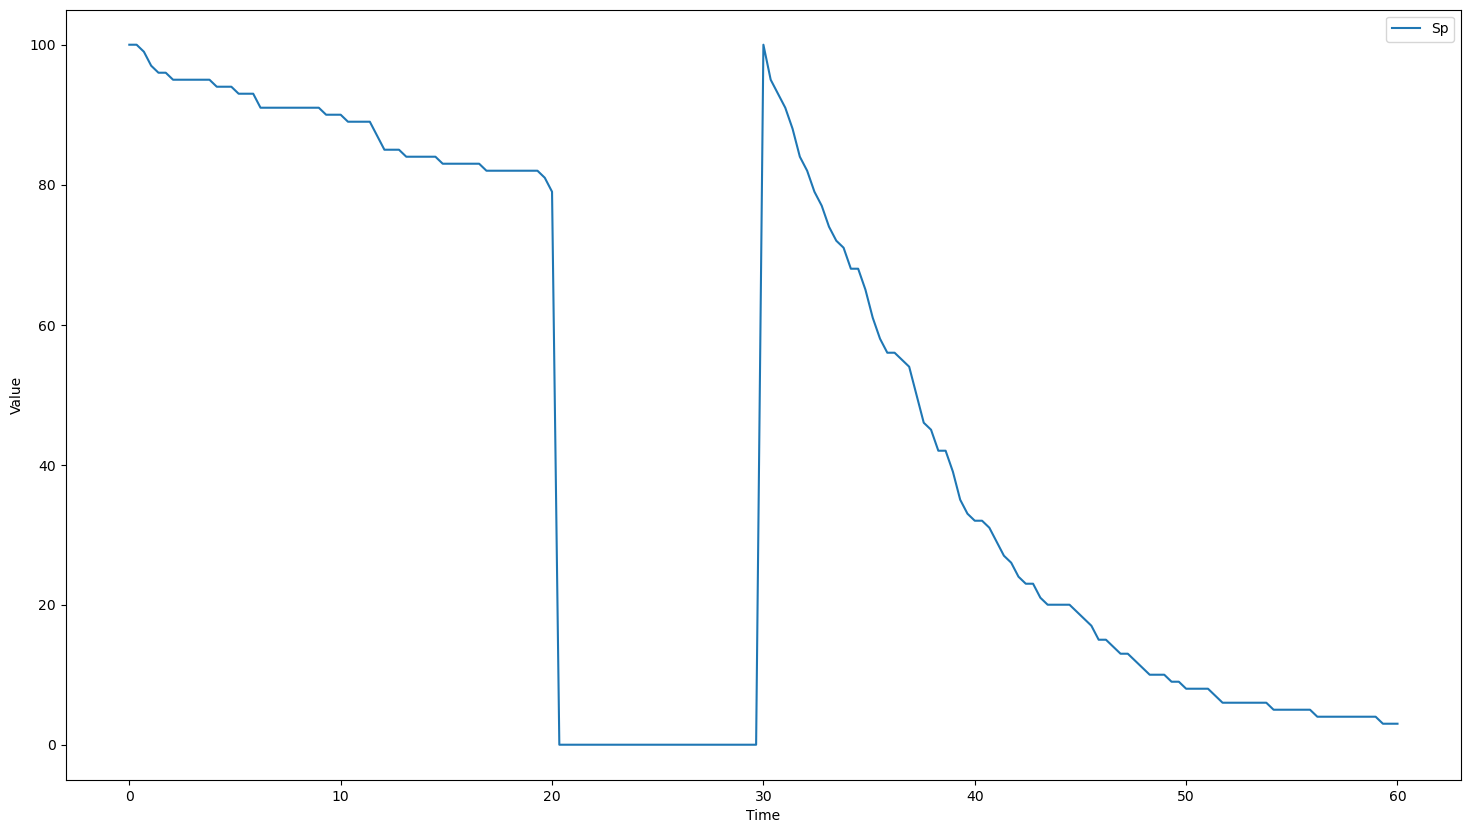

In [13]:
results.plot()

## Same System Modeled as Continuous with Events

In [14]:
for species in model.listOfSpecies.values():
        species.mode = 'continuous'

In [15]:
cresults = model.run(algorithm = "Tau-Hybrid")

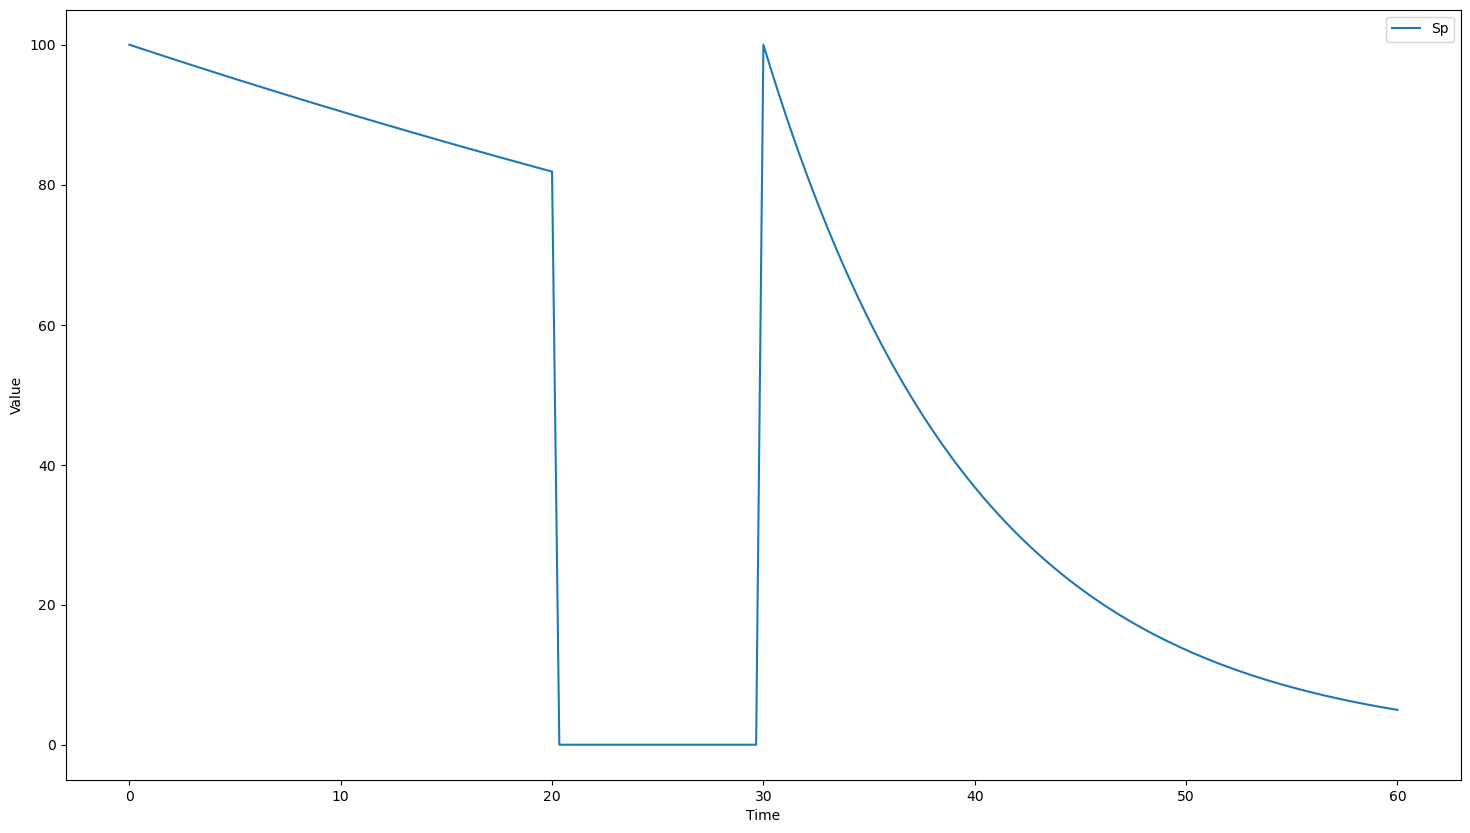

In [16]:
cresults.plot()